In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fid = drive.ListFile({'q':"title='Final_datateset_for_Image.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('Final_datateset_for_Image.zip')
f.keys()
!unzip Final_datateset_for_Image.zip

Streaming output truncated to the last 5000 lines.
  inflating: Final datateset for Image/validation/happy/16037.jpg  
  inflating: Final datateset for Image/validation/happy/16042.jpg  
  inflating: Final datateset for Image/validation/happy/16064.jpg  
  inflating: Final datateset for Image/validation/happy/16076.jpg  
  inflating: Final datateset for Image/validation/happy/16081.jpg  
  inflating: Final datateset for Image/validation/happy/16106.jpg  
  inflating: Final datateset for Image/validation/happy/16108.jpg  
  inflating: Final datateset for Image/validation/happy/16120.jpg  
  inflating: Final datateset for Image/validation/happy/16141.jpg  
  inflating: Final datateset for Image/validation/happy/16192.jpg  
  inflating: Final datateset for Image/validation/happy/16198.jpg  
  inflating: Final datateset for Image/validation/happy/16238.jpg  
  inflating: Final datateset for Image/validation/happy/16275.jpg  
  inflating: Final datateset for Image/validation/happy/1628.jpg 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.layers.serialization import activation
import numpy as np
import random as rn

In [ ]:
train_dir = '/content/Final datateset for Image/train'  
validation_dir = '/content/Final datateset for Image/validation'

In [ ]:
BATCH_SIZE = 50
IMG_SIZE = (224, 224)
no_classes = 13

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,shuffle=True,batch_size=BATCH_SIZE,image_size=IMG_SIZE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,shuffle=True,batch_size=BATCH_SIZE,image_size=IMG_SIZE)

Found 29183 files belonging to 13 classes.
Found 7358 files belonging to 13 classes.


In [ ]:
class_names = train_dataset.class_names
print(class_names)

['angry', 'disgust', 'fear', 'happy', 'joiariya', 'meghna', 'neutral', 'nitul', 'rafat', 'rasa', 'romiz', 'sad', 'surprise']


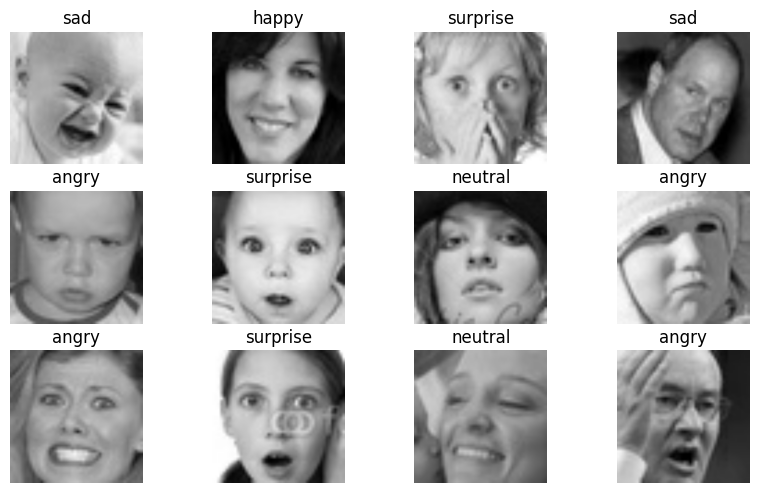

In [ ]:
#visulized some random Image With their Label
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(12):
    ax = plt.subplot(5, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# preprocessing

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.4)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224,224),
                                                    batch_size=50,
                                                    class_mode ='categorical',
                                                    subset='training')

Found 17514 images belonging to 13 classes.


In [ ]:
test_generator = train_datagen.flow_from_directory(validation_dir,
                                                   target_size=(224,224),
                                                   batch_size=50,
                                                   class_mode='categorical',
                                                   subset='validation')

Found 2939 images belonging to 13 classes.


In [ ]:
# Build  RESNET50 Model
num_classes = 13

base_model = ResNet50(include_top= False, weights= 'imagenet')

x= base_model.output
x= GlobalAveragePooling2D()(x)
x= Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs =base_model.input,outputs=predictions)

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = True

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,epochs=25)

Epoch 1/25
351/351 [==============================] - 309s 710ms/step - loss: 1.4901 - accuracy: 0.4418
Epoch 2/25
351/351 [==============================] - 246s 699ms/step - loss: 1.2237 - accuracy: 0.5335
Epoch 3/25
351/351 [==============================] - 244s 695ms/step - loss: 1.1479 - accuracy: 0.5688
Epoch 4/25
351/351 [==============================] - 242s 688ms/step - loss: 1.0868 - accuracy: 0.5851
Epoch 5/25
351/351 [==============================] - 243s 693ms/step - loss: 1.0485 - accuracy: 0.6040
Epoch 6/25
351/351 [==============================] - 245s 696ms/step - loss: 1.0091 - accuracy: 0.6182
Epoch 7/25
351/351 [==============================] - 243s 692ms/step - loss: 0.9739 - accuracy: 0.6302
Epoch 8/25
351/351 [==============================] - 247s 704ms/step - loss: 0.9377 - accuracy: 0.6494
Epoch 9/25
351/351 [==============================] - 243s 691ms/step - loss: 0.9086 - accuracy: 0.6559
Epoch 10/25
351/351 [==============================] - 242s 688m

Accuracy:  0.8470366597175598


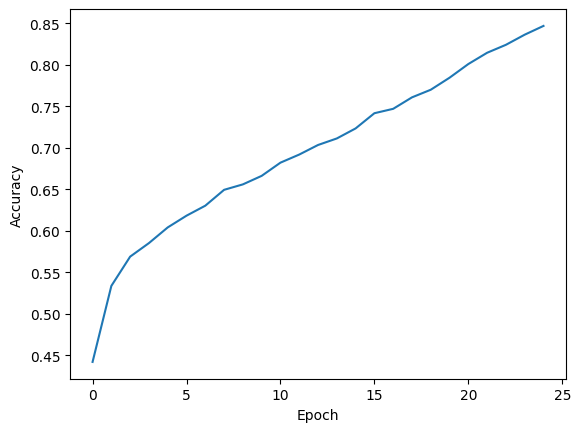

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
print("Accuracy: ",max(history.history['accuracy']))
plt.show()

In [ ]:
model.save('F:\\Army University Level Term\\Level 4 Term 1\\All LAB\Ann lab\\Model\\ResNet50_finetune.h5')

In [ ]:
# Tesing
import tensorflow as tf
import numpy as np
from PIL import Image

# Load the pre-trained model
model = tf.keras.models.load_model('F:\\Army University Level Term\\Level 4 Term 1\\All LAB\Ann lab\\Model\\ResNet50_finetune.h5')

In [ ]:
# Define the classes
classes = ['angry', 'disgust', 'fear', 'happy', 'joiariya', 'meghna', 'netural', 'nitul', 'rafat', 'rasa', 'romiz', 'sad', 'surprise']

In [ ]:
# Load the image to be tested
image = Image.open('/content/Final datateset for Image/validation/angry/10095.jpg')

# Convert the image to RGB format
image = image.convert('RGB')

# Resize the image to the same size used for training the model
image = image.resize((224, 224))

# Convert the image to a numpy array
image_array = np.asarray(image)

# Normalize the pixel values to be between 0 and 1
image_array = image_array / 255.0

# Add a batch dimension to the image array
image_array = np.expand_dims(image_array, axis=0)

In [ ]:
# Predict the class of the image using the pre-trained model
predictions = model.predict(image_array)

1/1 [==============================] - 1s 847ms/step


In [ ]:
# Get the index of the predicted class
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Get the name of the predicted class
predicted_class = classes[predicted_class_index]

# Print the predicted class
print('The predicted class is:', predicted_class)

The predicted class is: netural
